<a href="https://colab.research.google.com/github/aksshiny/anil/blob/master/Bike_linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Seoul Bike Sharing Demand Prediction

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive  
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Problem Description: 
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

Data Description

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)# 

In [ ]:
data= pd.read_csv("/content/SeoulBikeData.csv")

In [ ]:
# Copy the data for backup
df = data.copy()

In [ ]:
import pandas as pd
Seol_bike_data_df= pd.read_csv('/content/SeoulBikeData.csv')  

In [ ]:
# Getting feel of the data
Seol_bike_data_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Data pre-processing Understanding data# New Section

In [ ]:
# Data shape
df.shape

(8760, 14)

In [ ]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Statistical info 
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


Preprocessing the data

In [ ]:
# Checking null values of data 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking duplicate
df.duplicated().sum()

0

In [ ]:
Seol_bike_data_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
predictor_cols= ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day']

In [ ]:
categorical_features = ['Seasons',
       'Holiday', 'Functioning Day']

In [ ]:
Seol_bike_data_df_encoded= pd.get_dummies(Seol_bike_data_df[predictor_cols],
columns = categorical_features,
drop_first = True ) 

In [ ]:
import statsmodels.api as sm
X=sm.add_constant(Seol_bike_data_df_encoded)
y = Seol_bike_data_df['Rented Bike Count']
train_X, test_X, train_y, test_y = train_test_split( X ,
y,
train_size = 0.8,
random_state = 42 ) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
Seolbike_model_1 = sm.OLS(train_y, train_X).fit()
Seolbike_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                    OLS                     Adj. R-squared:           1.000       
Dependent Variable:       Rented Bike Count       AIC:                      -372964.3793
Date:                     2022-09-17 09:13        BIC:                      -372854.7024
No. Observations:         7008                    Log-Likelihood:           1.8650e+05  
Df Model:                 15                      F-statistic:              4.314e+32   
Df Residuals:             6992                    Prob (F-statistic):       0.00        
R-squared:                1.000                   Scale:                    4.5027e-25  
----------------------------------------------------------------------------------------
                           Coef.  Std.Err.           t            P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------------
const                      0.0000   0.0000                 4.7356 0.0000  0.0000  0.0000
Rented Bike Count          1.0000   0.0000 53699102229311232.0000 0.0000  1.0000  1.0000
Hour                       0.0000   0.0000                 1.3657 0.1721 -0.0000  0.0000
Temperature(°C)           -0.0000   0.0000                -4.2086 0.0000 -0.0000 -0.0000
Humidity(%)               -0.0000   0.0000                -1.8421 0.0655 -0.0000  0.0000
Wind speed (m/s)          -0.0000   0.0000                -1.9181 0.0551 -0.0000  0.0000
Visibility (10m)          -0.0000   0.0000               -24.9738 0.0000 -0.0000 -0.0000
Dew point temperature(°C)  0.0000   0.0000                 3.9666 0.0001  0.0000  0.0000
Solar Radiation (MJ/m2)    0.0000   0.0000                 0.4048 0.6856 -0.0000  0.0000
Rainfall(mm)               0.0000   0.0000                 0.5053 0.6134 -0.0000  0.0000
Snowfall (cm)              0.0000   0.0000                 0.8501 0.3953 -0.0000  0.0000
Seasons_Spring             0.0000   0.0000                 1.4736 0.1406 -0.0000  0.0000
Seasons_Summer            -0.0000   0.0000                -1.1809 0.2377 -0.0000  0.0000
Seasons_Winter             0.0000   0.0000                 1.1733 0.2407 -0.0000  0.0000
Holiday_No Holiday        -0.0000   0.0000                -2.4828 0.0131 -0.0000 -0.0000
Functioning Day_Yes       -0.0000   0.0000                -2.0150 0.0439 -0.0000 -0.0000
----------------------------------------------------------------------------------------
Omnibus:                     182.974              Durbin-Watson:                 0.617  
Prob(Omnibus):               0.000                Jarque-Bera (JB):              168.705
Skew:                        -0.332               Prob(JB):                      0.000  
Kurtosis:                    2.630                Condition No.:                 36881  
========================================================================================
* The condition number is large (4e+04). This might indicate             strong
multicollinearity or other numerical problems.
"""

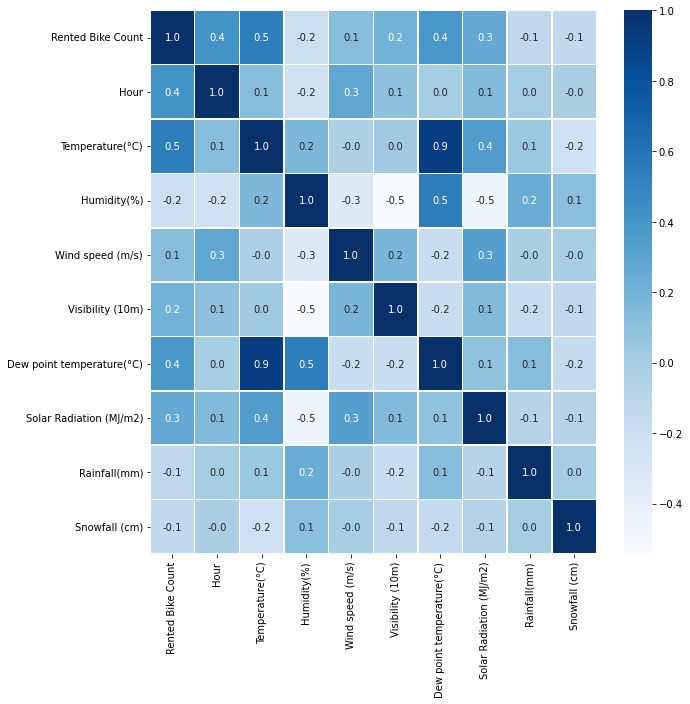

In [ ]:
f, axx = plt.subplots(figsize=(10,10))
sns.heatmap(Seol_bike_data_df.iloc[:,1:].corr(), linewidths=0.5, cmap="Blues", annot=True,fmt=".1f", ax=axx)
plt.show()

In [ ]:
#temperature and dewpoint
#remove temperature and dewpoint